#### [PREV](5.OOP_KNN.ipynb) | [HOME](../README.md) | [NEXT](7.OOP_Neural_Network_Adv.ipynb)

---

#  Neural Network Linear Regression: Simple approach

This Jupyter Notebook trains a very simple neural network model to perform Linear Regression. We will use the NESA Course Specifications Linear Regression dataset, which students are already familiar with so, they can focus on understanding the TensorFlow OOP Neural Network implementation.

#### Course Specifications

<figure>
    <center><img src="images\NN_Course-Specs.png" alt="Course Specs Neural Network image" width="500" />
    <figcaption><p><em>Source: Page 29 of the Software Engineering Course Specifications</em></p>
    </figcaption></center>
</figure>

Neural networks were designed to mimic the processing inside the human brain. They consist of a series of interconnected nodes (artificial neurones). Each neurone can accept a binary input signal and potentially output another signal to connected nodes.

In the diagram, signal strength between nodes with the strongest weightings are thicker representing a higher priority in determining the final output. The 'Bias' and 'Weightings' are learnt during the training cycle and used for predictions in the execution cycle.

#### Step 1 - Import Dependencies

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error 

print(tf.__version__)

2025-06-19 21:43:52.356695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750369435.944614    2291 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750369436.799305    2291 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750369445.022049    2291 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750369445.022089    2291 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750369445.022093    2291 computation_placer.cc:177] computation placer alr

2.19.0


#### Step 2: Import The Data
We will extended the dataset, to allow for test/training splitting.

In [2]:
#Import data as a numPy array
# Training features
X_feature = np.array([[-26], [-24], [-22], [-20], [-18], [-16], [-14], [-12], [-10], [-8], [-6], [-4], [-2], [0], [2], [4], [6], [8], [10], [12], [14], [16], [18], [20], [22], [24], [26]])

# Target variable
y_target = np.array([-27, -25, -23, -21, -19, -17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])


#### Step 3: Split The Data into Training And Testing Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2)

#### Step 4: Visualise The Data

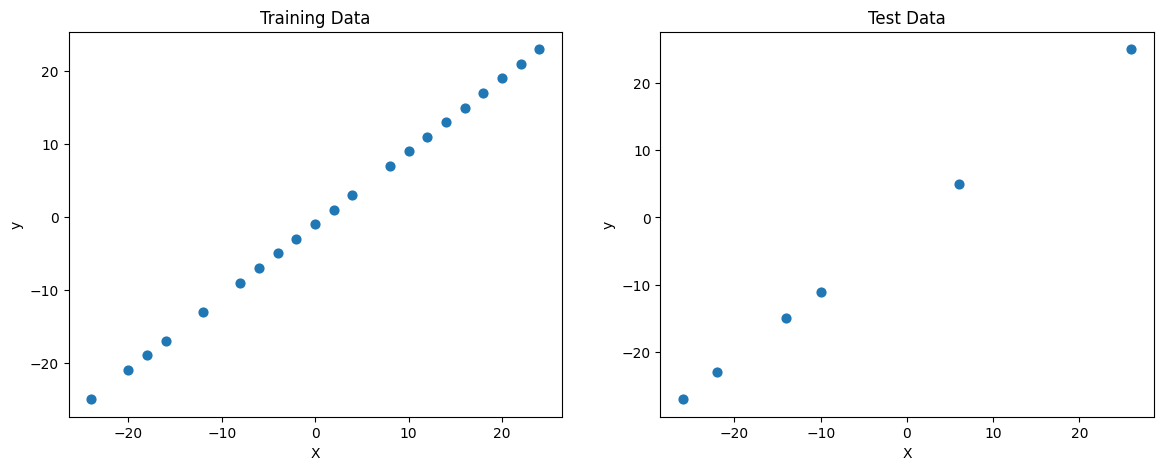

In [4]:
# Plot the training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train, y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")


axs[1].scatter(X_test, y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")
plt.show()

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [5]:
model = Sequential([
    Input(shape=(1,)),  # Input layer with 1 feature
    Dense(3),  # Hidden layer with 3 neurons
    Dense(1)            # Output layer with 1 neuron for regression
])

2025-06-19 21:44:30.814621: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### About this model

The above code will instantiate a model (lines 1-5) with an input layer (line 2) that, in this case, will have 1 neuron and take in an array of features. The model then has a hidden layer with 3 neurons (line 3). The model then has an output layer with 1 neuron (line 4) that will output a regression value. In training, the input data will be passed forward and backward in training cycles to find the optimal settings (see epochs below).

> [!Note]
>
> The output layer should have 2 neurons for binary classification or $n$ neurons for the $n$ classes in multiclass classification.

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `X_train` and `y_train` arrays.
2. The model learns to associate features and targets.
3. You ask the model to make predictions about a test set—in this example, the `X_test`.
4. Verify that the predictions match the targets from the `y_ array` array.


In [7]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=1, validation_split=0.2)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 440.1594 - mae: 18.7040 - val_loss: 571.3204 - val_mae: 20.4640
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319.2097 - mae: 14.5619 - val_loss: 545.5396 - val_mae: 20.0016
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 380.9488 - mae: 16.6804 - val_loss: 521.2092 - val_mae: 19.5566
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 405.8935 - mae: 17.1027 - val_loss: 498.6020 - val_mae: 19.1326
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 374.9350 - mae: 17.2053 - val_loss: 476.8698 - val_mae: 18.7151
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300.9617 - mae: 15.1682 - val_loss: 455.0961 - val_mae: 18.2886
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 245.8067 - mae: 13.0946 - val_loss: 434.8056 - val_mae: 17.8823
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 258.8607 - mae: 14.1210 - val_loss: 414.9209 - val_mae: 17.4727
Epoch 9/200
16/

#### Training Cycle 

An $Epoch$ represents one complete training cycle of a neural network. During each $Epoch$, the network processes the entire training dataset once, adjusting its internal weights and biases. Initially, these weights and biases are set to random values. Using the training data (inputs with known outputs), the network applies forward propagation to make predictions and backward propagation to iteratively update the weights. This process minimises the error between predicted and actual outputs. With repeated epochs, the network's accuracy improves as it learns to recognise patterns in the data.

### Step 8: Execution Cycle (Make predictions)

The execution cycle follows the training cycle and utilises the optimal internal values developed during the training cycle to determine the output. With the model trained, you can use it to make predictions about new features.

In [8]:
#Predict the target for a new data point
new_y = np.array([4])

new_y = model.predict(new_y)
print(f"New feature is:\n{new_y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
New feature is:
[[3.076073]]


> [!Important]
> Neural Network training is inherently [stochastic](https://en.wikipedia.org/wiki/Stochastic), the tuning of the neurons depends on the initialisation of the weights. So the result (the local minimum you end up in) depends on the initialisation too. This can be observed in the variance of this prediction after re-training the model.

#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


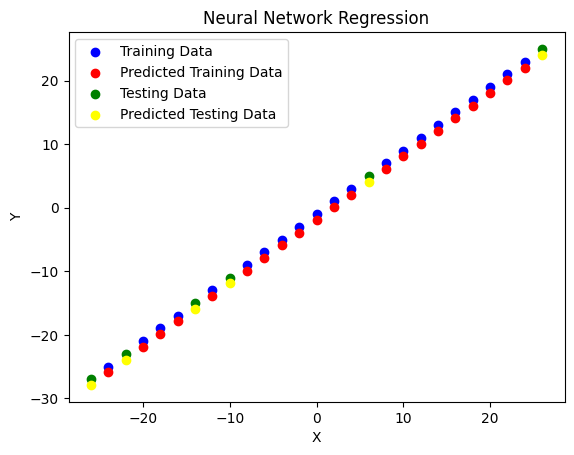

In [9]:
# Plot the actual data and model predictions
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_train, model.predict(y_train), label='Predicted Training Data', color='red')
plt.scatter(X_test, y_test, label='Testing Data', color='green')
plt.scatter(X_test, model.predict(y_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [10]:
#Get Evalutative Data from the model
model_eval = model.evaluate(X_test, y_test)
print(f"Model Evalutation: {model_eval}")
mae = mean_absolute_error(y_true=y_train,y_pred=model.predict(y_train)) 
mse = mean_squared_error(y_true=y_train,y_pred=model.predict(y_train))
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Manually calculate the loss and cost of the model
predictions = model.predict(y_train).flatten()
model_loss = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': abs(y_train - predictions)
})
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])
print(f"The cost or average loss of this model is {model_cost:.5f}")
print(model_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0088 - mae: 0.0908
Model Evalutation: [0.008848963305354118, 0.09080091863870621]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 0.9196532368659973
MSE: 0.8461530804634094

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The cost or average loss of this model is 0.04379
    Target  Predicted result      Loss
0       -1         -1.917024  0.917024
1       13         12.063646  0.936354
2       19         18.055363  0.944637
3      -17        -17.894932  0.894932
4       -5         -5.911501  0.911501
5       17         16.058125  0.941875
6       -7         -7.908739  0.908739
7      -19        -19.892170  0.892170
8       15         14.060886  0.939114
9      -13        -13.900455  0.900455
10     -21        -21.889408  0.889408
11       3          2.077453  0.922547
12       9          8.069169  0.930831
13      21         20.052601  0.947399
14       7          6.071931  0.928069
15       1          0.080215  0.